In [11]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [12]:
dataframe = pd.read_csv('renko_series.txt')

In [13]:
dataframe.columns

Index(['StartDateTime', 'EndDateTime', 'StartPrice', 'EndPrice',
       'TotalUpVolume', 'TotalDownVolume', 'TotalVolume', 'Color'],
      dtype='object')

In [14]:
# drop unnceunnecessary columns
dataframe = dataframe.drop(columns=['EndDateTime', 'TotalUpVolume', 'TotalDownVolume'])

# drop empty
dataframe = dataframe.dropna()

# rename columns
dataframe.columns = ['date', 'open', 'close', 'volume' , 'color']

dataframe.head()

,date,open,close,volume,color
0,08/13/2024 00:00:20,18670,18680,490,G
1,08/13/2024 00:10:25,18680,18685,661,G
2,08/13/2024 00:35:45,18685,18690,396,G
3,08/13/2024 00:38:55,18690,18695,323,G
4,08/13/2024 00:43:10,18695,18700,1709,G


In [15]:
# convert date column to Datetime and color column to string
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['color'] = dataframe['color'].astype(str)

dataframe.dtypes

date      datetime64[ns]
open               int64
close              int64
volume             int64
color             object
dtype: object

In [8]:
plt.rcParams["figure.figsize"] = (18,9)

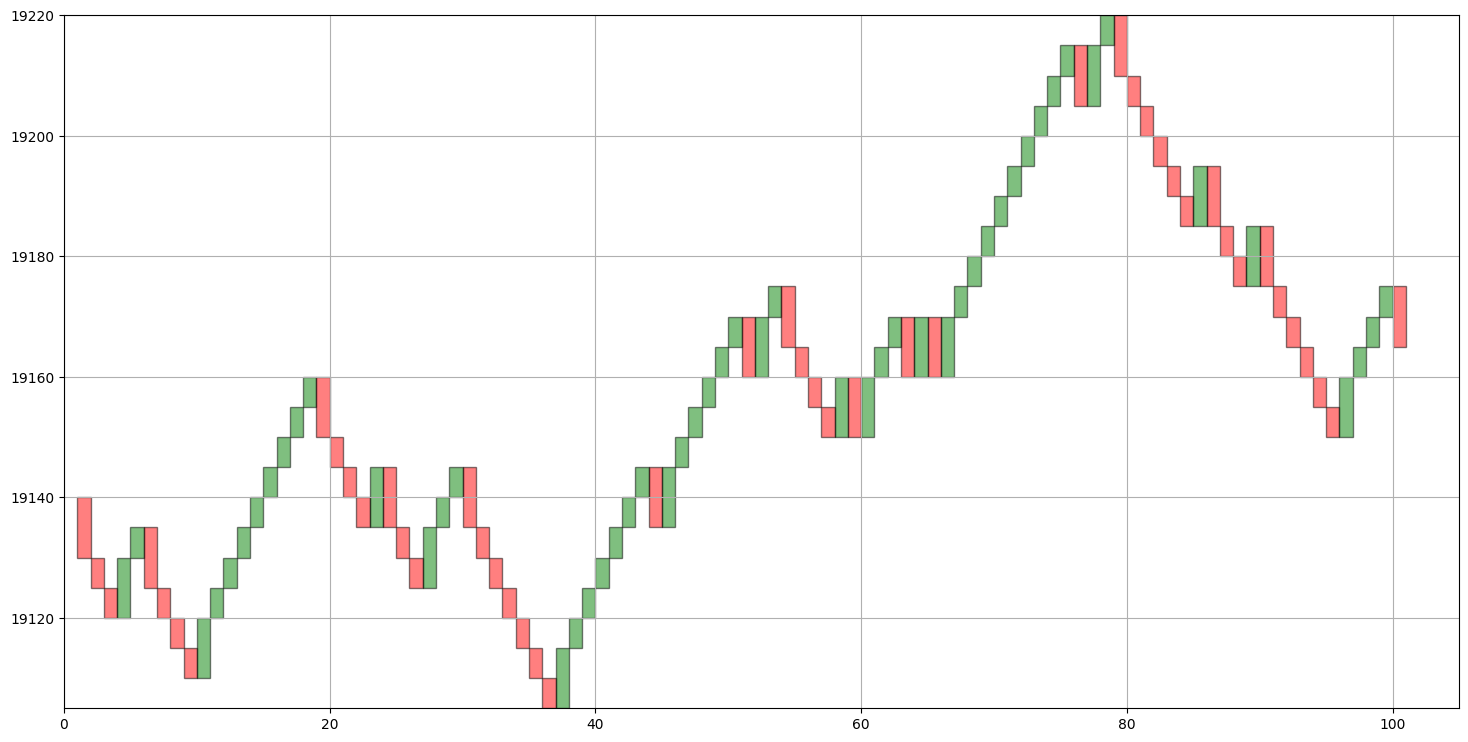

In [16]:
# create the figure
fig = plt.figure(1)
fig.clf()
axes = fig.gca()

# Add 10 extra spaces to the right
num_bars = 100
df = dataframe.tail(num_bars)

renkos = zip(df['open'],df['close'], df['color'])


index = 1

for open_price, close_price, color in renkos:
    # if 'color' = 'G' then 'green' else 'red' for facecolor variable
    facecolor = 'green' if color == 'G' else 'red'
    renko = matplotlib.patches.Rectangle((index,open_price), 1, close_price-open_price, edgecolor='black', facecolor=facecolor, alpha=0.5)
    axes.add_patch(renko)
    index = index + 1

#adjust the axes
plt.xlim([0, num_bars+5])
plt.ylim([min(min(df['open']),min(df['close'])), max(max(df['open']),max(df['close']))])
plt.grid(True)

plt.show()


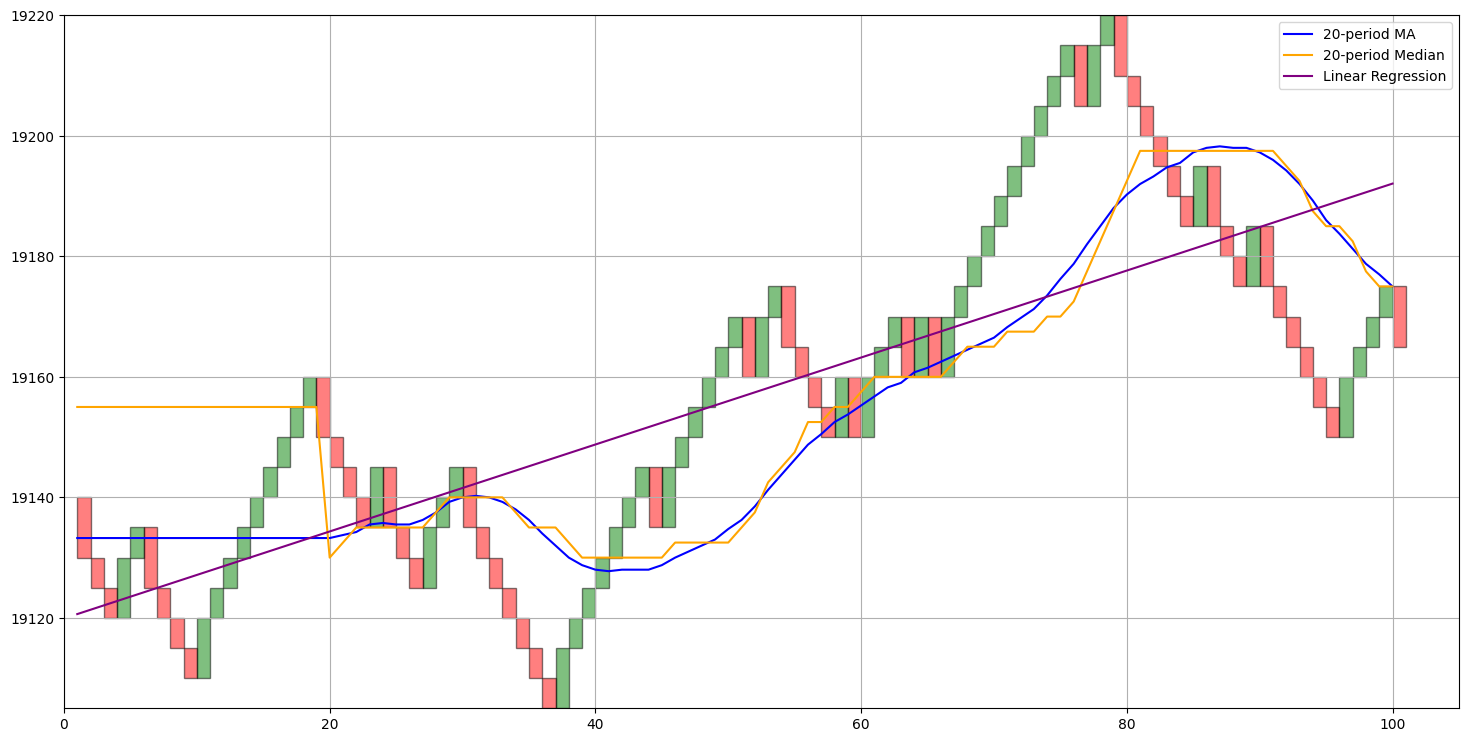

In [17]:
# Create the figure
fig = plt.figure(1)
fig.clf()
axes = fig.gca()

# Add 10 extra spaces to the right
num_bars = 100
df = dataframe.tail(num_bars).copy()  # Copy to avoid modifying the original DataFrame

# Ensure 'close' is numeric and drop any rows with NaN values to prevent errors in calculations
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df.dropna(subset=['close'], inplace=True)

# Calculate a 20-period moving average of the close prices
df.loc[:, 'MA20'] = df['close'].rolling(window=20).mean()

# Forward fill the NaN values at the beginning of the MA20 to extend the line to the start
df.loc[:, 'MA20'] = df['MA20'].fillna(df['MA20'].iloc[19])

# Calculate a 20-period rolling median of the close prices
df.loc[:, 'Median20'] = df['close'].rolling(window=20).median().fillna(df['close'].median())

# Calculate linear regression on the close prices
x = np.arange(len(df))
y = df['close'].values
slope, intercept = np.polyfit(x, y, 1)
df.loc[:, 'LinearRegression'] = slope * x + intercept

renkos = zip(df.index, df['open'], df['close'], df['color'])
# Plot the bars, green for 'up', red for 'down'
index = 1

for idx, open_price, close_price, color in renkos:
    facecolor = 'green' if color == 'G' else 'red'
    renko = matplotlib.patches.Rectangle((index, open_price), 1, close_price - open_price, edgecolor='black', facecolor=facecolor, alpha=0.5)
    axes.add_patch(renko)
    index = index + 1

# Plot the moving average, median, and linear regression lines
axes.plot(range(1, num_bars + 1), df['MA20'], color='blue', label='20-period MA')
axes.plot(range(1, num_bars + 1), df['Median20'], color='orange', label='20-period Median')
axes.plot(range(1, num_bars + 1), df['LinearRegression'], color='purple', label='Linear Regression')

# Adjust the axes
plt.xlim([0, num_bars + 5])
plt.ylim([min(min(df['open']), min(df['close'])), max(max(df['open']), max(df['close']))])

plt.grid(True)
plt.legend()
plt.show()